In [1]:
import hist
import awkward as ak
import matplotlib.pyplot as plt
import mplhep

In [2]:
myhist = (
        hist.Hist.new
        .Reg(50, 0, 100, name="observable", label="")
        .StrCat([], name="dataset", label="Dataset", growth=True)
        .Double()
    )

In [3]:
vars_sel = {
            "selectedmuons_p": ak.Array([[5.0, 10.0, 12.0, 20.0]]),
            "fourmuons_mass": ak.Array([[80.0]]),
}
for name, var in vars_sel.items():
    myhist.fill(dataset=name, observable=ak.flatten(var))

In [4]:
print(myhist)

Hist(
  Regular(50, 0, 100, name='observable'),
  StrCategory(['selectedmuons_p', 'fourmuons_mass'], growth=True, name='dataset', label='Dataset'),
  storage=Double()) # Sum: 5.0


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fc5291d4500>, errorbar=None, legend_artist=None)]

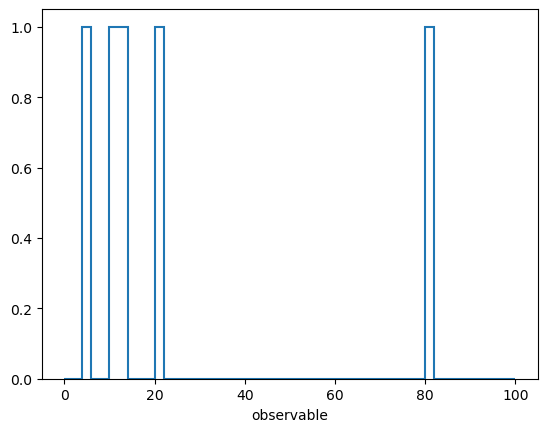

In [15]:
mplhep.histplot(myhist.project("observable"), yerr=False)


Hist(
  Regular(50, 0, 100, name='observable'),
  StrCategory(['selectedmuons_p', 'fourmuons_mass'], growth=True, name='dataset', label='Dataset'),
  storage=Double()) # Sum: 37.0


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fc528c52f90>, errorbar=None, legend_artist=None)]

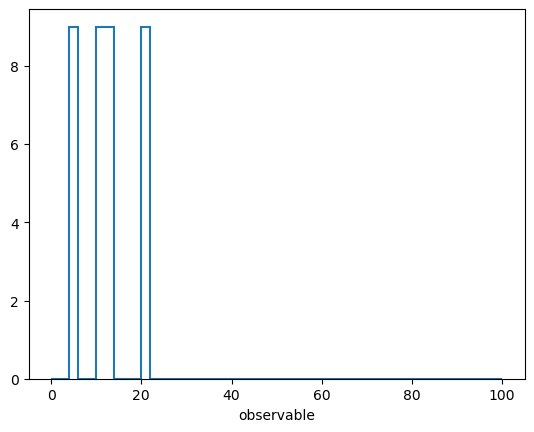

In [23]:
myarr=3*myhist[:,"selectedmuons_p"].view()
myhist[:,"selectedmuons_p"]=myarr
print(myhist)
mplhep.histplot(myhist[:,"selectedmuons_p"],yerr=False)